# Aula06.Ex09 - Resolução - Transformação Geométrica

Resolução do exercício proposto na Aula05.Ex01: "transformação geométrica a partir de uma matriz de transformação composta pela multiplicação de matrizes de transformações conhecidas: translação, rotação e escala".

### Importanto bibliotecas

Vamos utilizar uma biblioteca (Pillow) para geração de imagens  e manipulação de matrizes de pixel das imagens. Isso nos permitirá visualizar em tempo real as transformações geométricas realizadas.

Caso não tenha a biblioteca Pillow instalada:
`pip install Pillow`


In [9]:
from PIL import Image
from IPython.display import display
import math

### Criando e exibindo uma imagem vazia (pixels R=0, G=0, B=0)

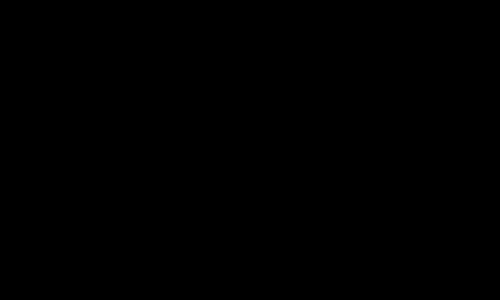

In [10]:
largura = 500
altura = 300

imagem = Image.new('RGB', (largura, altura))

display(imagem)

### Algoritmo de Bresenham

O algoritmo de Bresenham está definido abaixo. Confira a Aula03 do curso para relembrá-lo!

Nessa função, nosso algoritmo de Bresenham possui quatro parâmetros:
* v1 = coordenadas do ponto 1 (em formato matricial)
* v2 = coordenadas do ponto 2 (em formato matricial)
* imagem = objeto de imagem
* cor (opcional) = cor da linha pode ser branca ou vermelha

A saída do algorito é um segmento de reta entre v1 e v2.

In [11]:
def bresenham_line(v1, v2, imagem, cor='white'):
    
    # vertices recebidas no formato matricial
    x1 = v1[0][0]
    y1 = v1[1][0]
    
    x2 = v2[0][0]
    y2 = v2[1][0]
    
    cor_linha = (255,255,255) #white
    if cor == 'red':
        cor_linha = (255,0,0)

    matriz_pixels = imagem.load()
    
    # calculando diferenca em cada eixo
    dx = x2 - x1
    dy = y2 - y1
 
    # verificar se a linha é íngreme (steep)
    steep = False
    if abs(dy) > abs(dx): steep = True

 
    # se for íngreme, rotacionar a linha
    if steep:
        x1_temp = x1
        x1 = y1
        y1 = x1_temp
        
        x2_temp = x2
        x2 = y2
        y2 = x2_temp

 
    # Verificar se é necessario trocar as coordenadas
    # util para plotar da esquerda para direita
    swapped = False
    if x1 > x2:
        x1_temp = x1
        x1 = x2
        x2 = x1_temp
        
        y1_temp = y1
        y1 = y2
        y2 = y1_temp
        
        swapped = True
 
    # recalcular as diferencas no eixo
    dx = x2 - x1
    dy = y2 - y1
 
    # inicializando erro
    error = int(dx / 2.0)
    
    # inicilizando o incremento em y
    y_inc = -1
    if y1 < y2: y_inc = 1
 
    # inicializando y 
    y = y1
    
    # lista de coordenadas
    coordenadas = []
    
    # gerando coordenadas da linha
    for x in range(x1, x2 + 1): # incrementando x 
        coord = (x, y)
        if steep: # caso seja íngreme
            coord = (y, x)

        # adiciona a coordenada
        coordenadas.append(coord)
        
        # atualiza o erro
        error -= abs(dy)
        
        # incrementa y se erro for negativo
        if error < 0:
            y += y_inc
            error += dx
 
    # se as coordenadas foram trocadas, inverter a lista de coordenadas
    if swapped:
        coordenadas.reverse()
        
    for coord in coordenadas:
        x = coord[0]
        y = coord[1]
        if x < imagem.size[0] and y < imagem.size[1] and x >= 0 and y >= 0:
            matriz_pixels[x,y] = cor_linha
        

###### Desenhando um segmento de reta

Considere os vértices v1=(50,60) e v2=(200,300).

A chamada a seguir desenha um segmento partindo do vértice v1 e até o vértice v2.

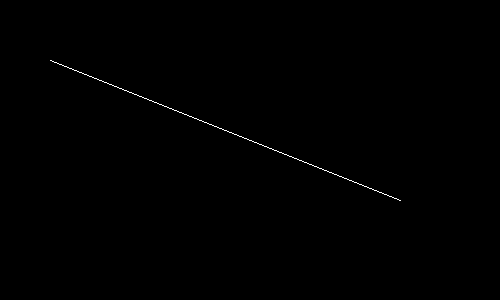

In [12]:
imagem = Image.new('RGB', (largura, altura))

v1 = [ 
        [50],
        [60]
     ]
v2 = [ 
        [400],
        [200]
     ]

bresenham_line(v1, v2, imagem)

display(imagem)

### Desenhando um Triângulo

Nosso triângulo possui os seguintes vértices:

* v1=(150,50)
* v2=(250,50)
* v3=(150,150)

Vamos desenhá-lo a seguir.

Atenção: nesse caso, o ponto (0,0) é está no ponto esquerdo superior da imagem.

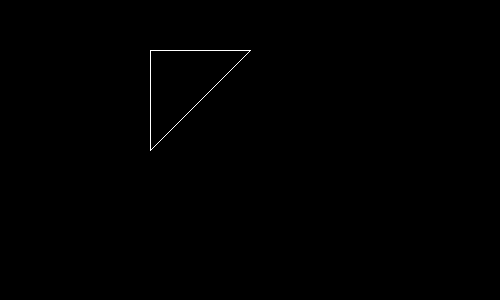

In [13]:
imagem = Image.new('RGB', (largura, altura))

v1 = [ [150], [50] ]
v2 = [ [250], [50] ]
v3 = [ [150], [150] ]

# de v1 para v2

bresenham_line(v1, v2, imagem)

# de v1 para v3
bresenham_line(v1, v3, imagem)

# de v3 para v2
bresenham_line(v3, v2, imagem)

display(imagem)

### Multiplicação de matrizes

Vimos na Aula05 que transformação geométrica em coordenadas homogêneas tem a grande vantagem de ser realizada por meio de simples multiplicação de matrizes.

Abaixo, vamos implementar uma função para multiplicar duas matrizes que será usada durante as nossas transformações geométricas.

In [14]:
def multiplica_matrizes(M1, M2):
    
    # recuperando dimensoes de M1
    m1_linhas = len(M1)
    m1_colunas = len(M1[0])
    
    # recuperando dimensoes de M2
    m2_linhas = len(M2)
    m2_colunas = len(M2[0])
    
    
    
    if m1_colunas != m2_linhas:
        print(m1_linhas,m1_colunas,m2_linhas,m2_colunas)
        print('Nao posso multiplicar. Dimensoes incorretas.')
        return -1

    # criando espaco para a M3
    M3 = [[0 for row in range(m2_colunas)] for col in range(m1_linhas)]
    
    for i in range(m1_linhas):
        for j in range(m2_colunas):
            for k in range(m1_colunas):
                M3[i][j] += M1[i][k] * M2[k][j]
                
                
    return M3

### Transformação Geométrica

Como resolução do exercício, vamos empregar a seguinte transformação geométrica:

1. Rotacionar o triângulo em 90 graus
2. Transladar em +100 no eixo x e +75 no eixo y

Uma forma solucionar é transladar o objeto a posição de referência, rotacionar e, por fim, transladar para a posição inicial seguida de outra translação para a posição +100 no eixo x e +75 no eixo y.

Vamos calcular a matriz de transformação final dessa operação.

In [15]:
def get_matriz_translacao(t_x, t_y):
    matriz_translacao = [
                            [1, 0, t_x],
                            [0, 1, t_y],
                            [0, 0, 1  ]
                        ]
    return matriz_translacao

def get_matriz_rotacao(angulo):
    c = math.cos(math.radians(angulo))
    s = math.sin(math.radians(angulo))
    matriz_rotacao = [
                        [c  , -s , 0],
                        [s  , c  , 0],
                        [0  , 0  , 1]
                      ]
    return matriz_rotacao

Matriz de transformação final

[6.123233995736766e-17, -1.0, 500.0]
[1.0, 6.123233995736766e-17, 25.0]
[0.0, 0.0, 1.0]


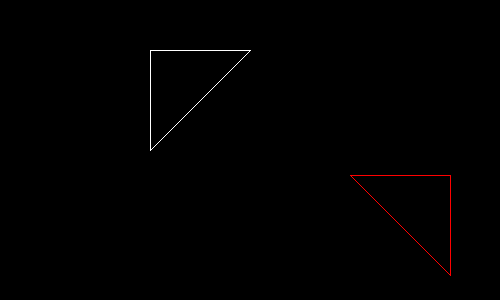

In [16]:
imagem = Image.new('RGB', (largura, altura))

# vertices do triângulo (lembre-se que mantemos h=1), no formato matricial
v1=[[150],[50],[1]]
v2=[[250],[50],[1]]
v3=[[150],[150],[1]]

# vamos desenhar o triangulo original na cor branca
bresenham_line(v1, v2, imagem)
bresenham_line(v1, v3, imagem)
bresenham_line(v2, v3, imagem)

# matriz de translacao para a origem
m1 = get_matriz_translacao(-150, -50)
# matriz de rotacao em 90 graus
m2 = get_matriz_rotacao(90)
# matriz de translacao de volta para a posicao original
m3 = get_matriz_translacao(+150, +50)
# matriz de translacao de +300 em x e +125 em y
m4 = get_matriz_translacao(+300, +125)

# matriz de transformacão final (ORDEM DA MULTIPLICAÇÃO É IMPORTANTE)
m_final = multiplica_matrizes(m2,m1)
m_final = multiplica_matrizes(m3,m_final)
m_final = multiplica_matrizes(m4,m_final)
#m_final = m2

print('Matriz de transformação final\n')
print(m_final[0])
print(m_final[1])
print(m_final[2])

# modificando os vertices do triangulo
v1_f = multiplica_matrizes(m_final, v1)
v2_f = multiplica_matrizes(m_final, v2)
v3_f = multiplica_matrizes(m_final, v3)

# transformando para inteiros
for i in range(3):
    v1_f[i][0] = int(v1_f[i][0])
    v2_f[i][0] = int(v2_f[i][0])
    v3_f[i][0] = int(v3_f[i][0])
    

# vamos desenhar o triangulo transladado na cor vermelha
bresenham_line(v1_f, v2_f, imagem, cor='red')
bresenham_line(v1_f, v3_f, imagem, cor='red')
bresenham_line(v2_f, v3_f, imagem, cor='red')

display(imagem)